In [1]:
#import libraries

from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Re-size all the images to this format

IMAGE_SIZE = [224,224]

#Train data(images) path
train_path = 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training'
#Test data(images) path
valid_path= 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Testing'

# Add Preprocessing layer to the front of VGG19

In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top = False)

#dont train existing weights
for layer in vgg19.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 6s 0us/step


In [4]:
#Getting number of classes

folders = glob('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training/*')

In [5]:
folders

['C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training\\Cat',
 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training\\Dog']

In [6]:
# Our layers - you can add more layers if you want
x = Flatten()(vgg19.output)

#Define the output layer
predicition = Dense(len(folders),activation='softmax')(x)

# Create a model object

In [7]:
model = Model(inputs=vgg19.input,outputs=predicition)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
#Tell the model what cost and optimization method to use

model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [9]:
#To perform image agumentation 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set = train_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
print('*'*75)


#Testing set
print('Testing Samples:\n')
test_set = test_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Testing',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Training length:

Found 600 images belonging to 2 classes.
***************************************************************************
Testing Samples:

Found 120 images belonging to 2 classes.


# Train the model

In [10]:
r = model.fit(training_set,
             validation_data=test_set,
             epochs = 10,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))

Epoch 1/10
19/19 [==============================] - 348s 18s/step - loss: 1.2502 - accuracy: 0.6067 - val_loss: 0.5622 - val_accuracy: 0.7250
Epoch 2/10
19/19 [==============================] - 343s 18s/step - loss: 0.3730 - accuracy: 0.8267 - val_loss: 0.3864 - val_accuracy: 0.8333
Epoch 3/10
19/19 [==============================] - 340s 18s/step - loss: 0.1902 - accuracy: 0.9267 - val_loss: 0.3420 - val_accuracy: 0.8500
Epoch 4/10
19/19 [==============================] - 345s 18s/step - loss: 0.1684 - accuracy: 0.9417 - val_loss: 0.3365 - val_accuracy: 0.8667
Epoch 5/10
19/19 [==============================] - 345s 18s/step - loss: 0.1019 - accuracy: 0.9833 - val_loss: 0.2777 - val_accuracy: 0.8833
Epoch 6/10
19/19 [==============================] - 342s 18s/step - loss: 0.1009 - accuracy: 0.9767 - val_loss: 0.2674 - val_accuracy: 0.8833
Epoch 7/10
19/19 [==============================] - 343s 18s/step - loss: 0.0749 - accuracy: 0.9867 - val_loss: 0.2599 - val_accuracy: 0.9083
Epoch 

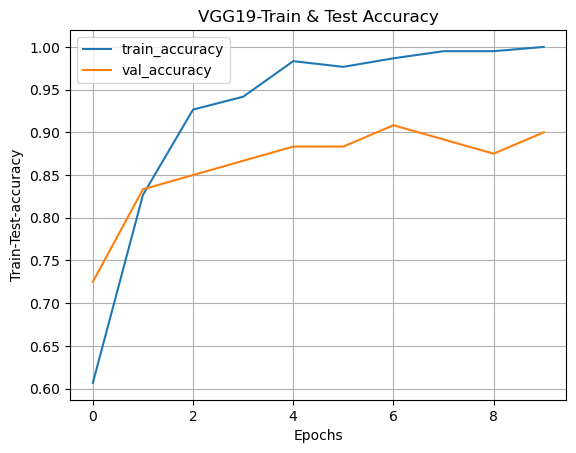

<Figure size 640x480 with 0 Axes>

In [11]:
#Accuracy
plt.title('VGG19-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test-accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG19--Accuracy & Val_Accuracy')

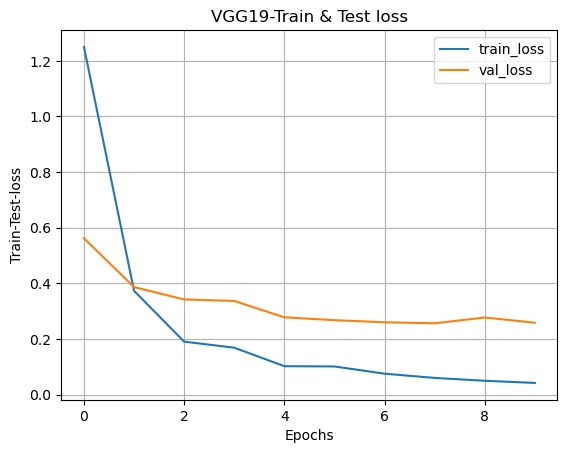

<Figure size 640x480 with 0 Axes>

In [12]:
#loss
plt.title('VGG19-Train & Test loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test-loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG19--Loss & Val_loss')

In [13]:
import tensorflow as tf
from keras.models import load_model
model.save('VGG19_dog_cat_classif.keras')

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypred = model.predict(test_set,100//5)
ypred = np.argmax(ypred,axis=1)
print('Confusion Matrix:')
print(confusion_matrix(test_set.classes,ypred))
print('*'*75)
print('Classification Report:')
print(classification_report(test_set.classes,ypred,target_names=['Cat','Dog']))
print('*'*75)
print(accuracy_score(test_set.classes,ypred))

4/4 [==============================] - 56s 14s/step
Confusion Matrix:
[[36 24]
 [26 34]]
***************************************************************************
Classification Report:
              precision    recall  f1-score   support

         Cat       0.58      0.60      0.59        60
         Dog       0.59      0.57      0.58        60

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120

***************************************************************************
0.5833333333333334


<Axes: >

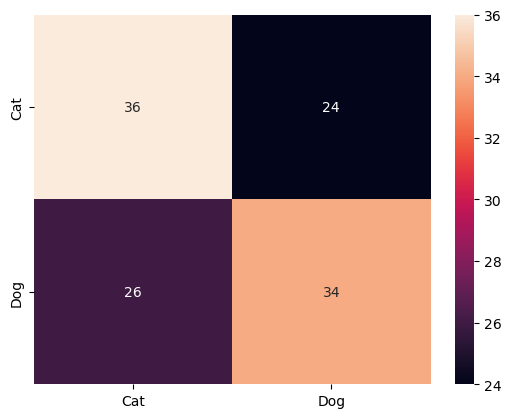

In [18]:
import seaborn as sns

sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['Cat','Dog'],
           yticklabels=['Cat','Dog'])